<a href="https://colab.research.google.com/github/prudhvirajboddu/TensorFlowML/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0 #Preprocess Data converting to float 

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

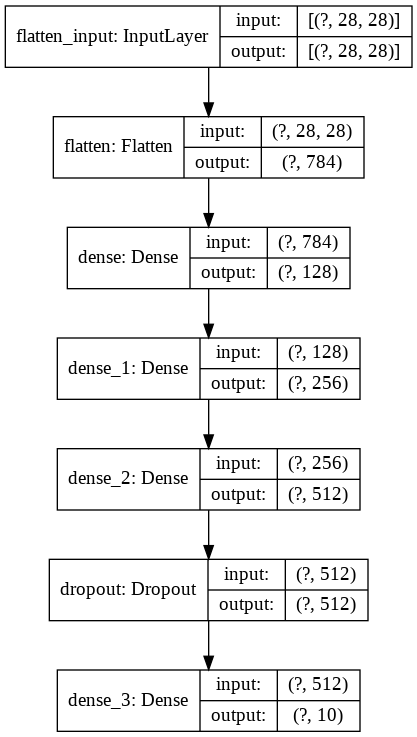

In [6]:
tf.keras.utils.plot_model(model,show_shapes=True,expand_nested=True)

In [7]:
model.fit(x_train, y_train, epochs=10)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2210 - accuracy: 0.9320
Epoch 2/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1018 - accuracy: 0.9686
Epoch 3/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0761 - accuracy: 0.9762
Epoch 4/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0617 - accuracy: 0.9807
Epoch 5/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0518 - accuracy: 0.9837
Epoch 6/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0429 - accuracy: 0.9868
Epoch 7/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0369 - accuracy: 0.9883
Epoch 8/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0344 - accuracy: 0.9895
Epoch 9/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0321 - accuracy: 0.9902
Epoch 10/10
6

[0.0993994692415803, 0.9779]

In [0]:
import matplotlib.pyplot as plt

history_dict=model.history

In [9]:
history_dict.history.keys()

dict_keys(['loss', 'accuracy'])

In [0]:
loss=history_dict.history['loss']
acc=history_dict.history['accuracy']

In [11]:
history_dict.history.keys()

dict_keys(['loss', 'accuracy'])

In [0]:
epochs=range(1,len(acc)+1)

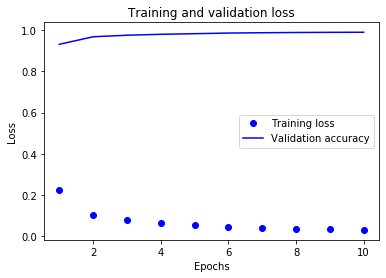

In [14]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, acc, 'b', label='Validation accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

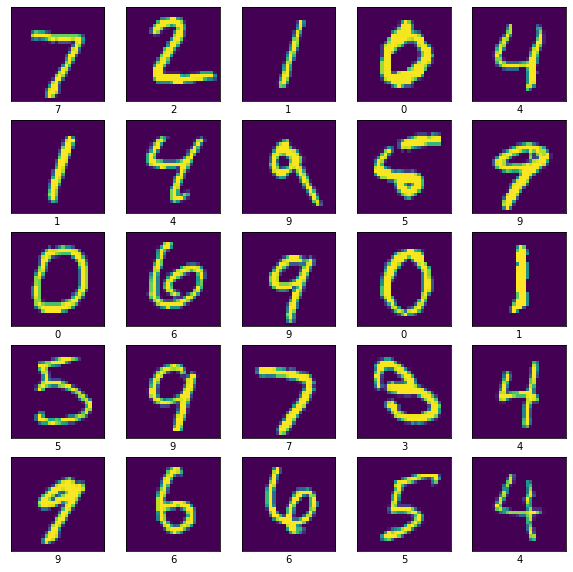

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(y_test[i])
plt.show()
#plotting test set values along with the labels